# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Anggi Purnomo Sotomai]
- **Email:** [anggipurnomosotomani@nusantara.ac.id]
- **ID Dicoding:** [anggi_purnomo_sotomani_yeXN

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana performa pendaftaran bikesharing dalam beberapa bulan terakhir?
- Pertanyaan 2: Dibulan apa kelembapan udara paling rendah untuk waktu bersepeda yang baik?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
day_df=pd.read_csv('/content/sample_data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df=pd.read_csv('/content/sample_data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Menilai Tabel day_df**

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah Duplikasi: ", day_df.duplicated().sum())

Jumlah Duplikasi:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
day_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

**Menilai Tabel hour_df**

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [12]:
print("Total Duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Total Duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

**Membersikan Tabel day_df**

Duplikat Data

In [13]:
day_df.duplicated().sum()

0

In [14]:
day_df.drop_duplicates(inplace=True)

In [15]:
print("Total Duplikasi: ", day_df.duplicated().sum())

Total Duplikasi:  0


Nilai Yang Hilang

In [16]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [17]:
day_df[day_df.casual.isnull()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [18]:
day_df.casual.value_counts()

120     4
968     4
163     3
653     3
123     3
       ..
2521    1
1935    1
783     1
688     1
364     1
Name: casual, Length: 606, dtype: int64

In [19]:
day_df.fillna(value="Prefer not to say", inplace=True)

In [20]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Nilai yang tidak akurat

In [21]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [22]:
day_df[day_df.casual == day_df.casual.max()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
504,505,2012-05-19,2,1,5,0,6,0,1,0.6,0.566908,0.45625,0.083975,3410,4884,8294


In [23]:
day_df.casual.replace(day_df.casual.max(), 70, inplace=True)

In [24]:

day_df[day_df.casual == day_df.casual.max()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
512,513,2012-05-27,2,1,5,0,0,0,1,0.69,0.641425,0.697083,0.215171,3283,3308,6591


In [25]:
day_df.casual.replace(day_df.casual.max(), 50, inplace=True)

In [26]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,839.184679,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,675.248364,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,312.000000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,709.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1091.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3252.000000,6946.000000,8714.000000


**Membersikan Tabel hour_df**

In [27]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Memperbaiki Tipe data

In [28]:
datetime_columns = ["dteday", "weekday", "windspeed", "casual", "registered", "cnt"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [29]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  datetime64[ns]
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  datetime64[ns]
 14  casual      17379 non-null  datetime64[ns]
 15  registered  17379 non-null  datetime64[ns]
 16  cnt         17379 non-

In [30]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,1970-01-01 00:00:00.000000006,0,1,0.24,0.2879,0.81,1970-01-01,1970-01-01 00:00:00.000000003,1970-01-01 00:00:00.000000013,1970-01-01 00:00:00.000000016
1,2,2011-01-01,1,0,1,1,0,1970-01-01 00:00:00.000000006,0,1,0.22,0.2727,0.80,1970-01-01,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000032,1970-01-01 00:00:00.000000040
2,3,2011-01-01,1,0,1,2,0,1970-01-01 00:00:00.000000006,0,1,0.22,0.2727,0.80,1970-01-01,1970-01-01 00:00:00.000000005,1970-01-01 00:00:00.000000027,1970-01-01 00:00:00.000000032
3,4,2011-01-01,1,0,1,3,0,1970-01-01 00:00:00.000000006,0,1,0.24,0.2879,0.75,1970-01-01,1970-01-01 00:00:00.000000003,1970-01-01 00:00:00.000000010,1970-01-01 00:00:00.000000013
4,5,2011-01-01,1,0,1,4,0,1970-01-01 00:00:00.000000006,0,1,0.24,0.2879,0.75,1970-01-01,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000001


## Exploratory Data Analysis (EDA)

### Explore ...

**Explore day_df**

In [31]:
day_df.sample(6)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
651,652,2012-10-13,4,1,10,0,6,0,1,0.393333,0.391396,0.494583,0.146142,2252,4857,7109
351,352,2011-12-18,4,0,12,0,0,0,1,0.238333,0.245579,0.586250,0.169779,220,2211,2431
95,96,2011-04-06,2,0,4,0,3,1,1,0.390833,0.387608,0.470833,0.263063,413,2395,2808
158,159,2011-06-08,2,0,6,0,3,1,1,0.775833,0.727279,0.622083,0.136817,676,3725,4401
665,666,2012-10-27,4,1,10,0,6,0,2,0.530000,0.515133,0.720000,0.235692,2643,5209,7852
287,288,2011-10-15,4,0,10,0,6,0,1,0.506667,0.498725,0.483333,0.258083,1899,3318,5217


In [32]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,839.184679,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,675.248364,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,312.000000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,709.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1091.000000,4776.500000,5956.000000


In [33]:
day_df.instant.is_unique

True

In [34]:
day_df.instant.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
726    False
727    False
728    False
729    False
730    False
Name: instant, Length: 731, dtype: bool

In [35]:
day_df.groupby(by="mnth").agg({
    "instant": "nunique",
    "registered": ["max", "min", "mean", "std", ]
})

instant registered                                
     nunique        max   min         mean          std
mnth                                                   
1         62       4185   416  1982.112903  1053.274474
2         57       4546   905  2392.789474  1091.126003
3         62       5893   491  2975.419355  1513.254354
4         60       5950   674  3471.533333  1414.571151
5         62       6433  2213  4135.500000  1093.179612
6         60       6456  2993  4540.600000  1012.958885
7         62       6790  2298  4303.080645  1190.542490
8         62       6541   889  4502.500000  1335.126601
9         60       6946  1689  4594.466667  1547.716749
10        62       6911    20  4235.354839  1685.022519
11        60       5520   935  3637.133333  1219.589045
12        62       6055   432  3053.919355  1465.052959

In [36]:
day_df.groupby(by="weekday").instant.nunique().sort_values(ascending=False)

weekday
0    105
1    105
6    105
2    104
3    104
4    104
5    104
Name: instant, dtype: int64

In [37]:
day_df.groupby(by="workingday").instant.nunique().sort_values(ascending=False)

workingday
1    500
0    231
Name: instant, dtype: int64

**Explore hour_df**

In [38]:
hour_df.sample(6)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
13050,13051,2012-07-02,3,1,7,23,0,1970-01-01 00:00:00.000000001,1,1,0.74,0.6667,0.51,1970-01-01,1970-01-01 00:00:00.000000012,1970-01-01 00:00:00.000000090,1970-01-01 00:00:00.000000102
10434,10435,2012-03-15,1,1,3,21,0,1970-01-01 00:00:00.000000004,1,1,0.54,0.5152,0.68,1970-01-01,1970-01-01 00:00:00.000000036,1970-01-01 00:00:00.000000207,1970-01-01 00:00:00.000000243
2424,2425,2011-04-15,2,0,4,22,1,1970-01-01 00:00:00.000000005,0,2,0.38,0.3939,0.82,1970-01-01,1970-01-01 00:00:00.000000016,1970-01-01 00:00:00.000000064,1970-01-01 00:00:00.000000080
11460,11461,2012-04-27,2,1,4,17,0,1970-01-01 00:00:00.000000005,1,1,0.54,0.5152,0.24,1970-01-01,1970-01-01 00:00:00.000000089,1970-01-01 00:00:00.000000613,1970-01-01 00:00:00.000000702
12744,12745,2012-06-20,2,1,6,5,0,1970-01-01 00:00:00.000000003,1,1,0.66,0.6061,0.83,1970-01-01,1970-01-01 00:00:00.000000002,1970-01-01 00:00:00.000000037,1970-01-01 00:00:00.000000039
9261,9262,2012-01-26,1,1,1,19,0,1970-01-01 00:00:00.000000004,1,2,0.40,0.4091,0.76,1970-01-01,1970-01-01 00:00:00.000000011,1970-01-01 00:00:00.000000302,1970-01-01 00:00:00.000000313


In [39]:
registered_time = hour_df["registered"] - hour_df["dteday"]
registered_time = registered_time.apply(lambda x: x.total_seconds())
hour_df["registered_time"] = round(registered_time/86400)

In [40]:
hour_df.sample(6)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,registered_time
11046,11047,2012-04-10,2,1,4,10,0,1970-01-01 00:00:00.000000002,1,1,0.46,0.4545,0.47,1970-01-01,1970-01-01 00:00:00.000000049,1970-01-01 00:00:00.000000132,1970-01-01 00:00:00.000000181,-15440.0
2298,2299,2011-04-10,2,0,4,15,0,1970-01-01 00:00:00.000000000,0,1,0.50,0.4848,0.77,1970-01-01,1970-01-01 00:00:00.000000156,1970-01-01 00:00:00.000000141,1970-01-01 00:00:00.000000297,-15074.0
15915,15916,2012-10-31,4,1,10,20,0,1970-01-01 00:00:00.000000003,1,2,0.40,0.4091,0.50,1970-01-01,1970-01-01 00:00:00.000000009,1970-01-01 00:00:00.000000259,1970-01-01 00:00:00.000000268,-15644.0
4974,4975,2011-07-31,3,0,7,4,0,1970-01-01 00:00:00.000000000,0,1,0.72,0.6818,0.70,1970-01-01,1970-01-01 00:00:00.000000006,1970-01-01 00:00:00.000000007,1970-01-01 00:00:00.000000013,-15186.0
771,772,2011-02-04,1,0,2,14,0,1970-01-01 00:00:00.000000005,1,2,0.28,0.2727,0.45,1970-01-01,1970-01-01 00:00:00.000000015,1970-01-01 00:00:00.000000076,1970-01-01 00:00:00.000000091,-15009.0
4614,4615,2011-07-16,3,0,7,4,0,1970-01-01 00:00:00.000000006,0,1,0.60,0.5909,0.73,1970-01-01,1970-01-01 00:00:00.000000009,1970-01-01 00:00:00.000000007,1970-01-01 00:00:00.000000016,-15171.0


In [41]:
hour_df.describe(include="all")

<ipython-input-41-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")
<ipython-input-41-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")
<ipython-input-41-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")
<ipython-input-41-55b8ff84265d>:1: FutureWarning: Tr

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,registered_time
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379,17379,17379,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,1,322,776,869,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000000006,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00.000000004,1970-01-01 00:00:00.000000005,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,2512,NaN,NaN,NaN,NaN,NaN,17379,1581,307,260,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00.000000001,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000000006,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00,1970-01-01 00:00:00.000000367,1970-01-01 00:00:00.000000886,1970-01-01 00:00:00.000000977,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,NaN,0.682721,1.425283,0.496987,0.475775,0.627229,NaN,NaN,NaN,NaN,-15341.172622
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,NaN,0.465431,0.639357,0.192556,0.171850,0.192930,NaN,NaN,NaN,NaN,210.072051
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,0.000000,1.000000,0.020000,0.000000,0.000000,NaN,NaN,NaN,NaN,-15705.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,NaN,0.000000,1.000000,0.340000,0.333300,0.480000,NaN,NaN,NaN,NaN,-15523.000000


<Axes: >

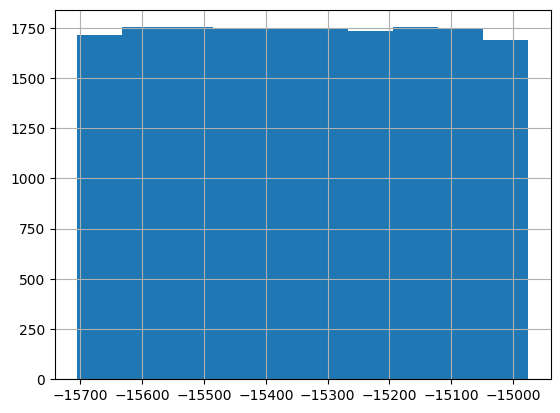

In [42]:
hour_df.registered_time.hist()

In [43]:
instant_in_hour_df =  hour_df.instant
day_df["status"] = day_df["instant"].apply(lambda x: "Active" if x in instant_in_hour_df else "Non Active")
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,status
722,723,2012-12-23,1,1,12,0,0,0,1,0.245833,0.259471,0.515417,0.133083,408,1379,1787,Active
80,81,2011-03-22,2,0,3,0,2,1,1,0.441667,0.440642,0.624583,0.225750,460,2243,2703,Active
218,219,2011-08-07,3,0,8,0,0,0,1,0.742500,0.715292,0.752917,0.201487,1298,2487,3785,Active
295,296,2011-10-23,4,0,10,0,0,0,1,0.421667,0.422333,0.741250,0.099513,1619,2762,4381,Active
98,99,2011-04-09,2,0,4,0,6,0,2,0.342500,0.341529,0.877500,0.133083,879,1576,2455,Active


In [44]:
day_df.groupby(by="status").instant.count()

status
Active    731
Name: instant, dtype: int64

In [45]:
day_df[day_df.status == "Non Active"]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,status


Menggabungkan data day_df dan hour_df

In [46]:
hour_day_df = pd.merge(
    left=hour_df,
    right=day_df,
    how="left",
    left_on="instant",
    right_on="instant"
)
hour_day_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y,status
0,1,2011-01-01,1,0,1,0,0,1970-01-01 00:00:00.000000006,0,1,...,0.0,2.0,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0,Active
1,2,2011-01-01,1,0,1,1,0,1970-01-01 00:00:00.000000006,0,1,...,0.0,2.0,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0,Active
2,3,2011-01-01,1,0,1,2,0,1970-01-01 00:00:00.000000006,0,1,...,1.0,1.0,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0,Active
3,4,2011-01-01,1,0,1,3,0,1970-01-01 00:00:00.000000006,0,1,...,1.0,1.0,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0,Active
4,5,2011-01-01,1,0,1,4,0,1970-01-01 00:00:00.000000006,0,1,...,1.0,1.0,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0,Active


In [47]:
hour_day_df.groupby(by="weekday_x").instant.nunique().sort_values(ascending=False).head(7)

weekday_x
1970-01-01 00:00:00.000000006    2512
1970-01-01 00:00:00.000000000    2502
1970-01-01 00:00:00.000000005    2487
1970-01-01 00:00:00.000000001    2479
1970-01-01 00:00:00.000000003    2475
1970-01-01 00:00:00.000000004    2471
1970-01-01 00:00:00.000000002    2453
Name: instant, dtype: int64

In [48]:
hour_day_df.groupby(by="workingday_x").instant.nunique().sort_values(ascending=False)

workingday_x
1    11865
0     5514
Name: instant, dtype: int64

In [49]:
hour_day_df.groupby(by="mnth_x").instant.nunique().sort_values(ascending=False)

mnth_x
5     1488
7     1488
12    1483
8     1475
3     1473
10    1451
6     1440
4     1437
9     1437
11    1437
1     1429
2     1341
Name: instant, dtype: int64

In [50]:
hour_day_df["registered_Group"] = hour_day_df.registered_y.apply(lambda x: "Youth" if x <= 24 else ("Seniors" if x > 64 else "Adults"))

In [52]:
hour_day_df.groupby(by="registered_Group").instant.nunique().sort_values(ascending=False)

registered_Group
Adults     16648
Seniors      730
Youth          1
Name: instant, dtype: int64

In [53]:
all_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="instant",
    right_on="instant"
)
all_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y,registered_time
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,1,0.24,0.2879,0.81,1970-01-01,1970-01-01 00:00:00.000000003,1970-01-01 00:00:00.000000013,1970-01-01 00:00:00.000000016,-14975.0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,0,1,0.22,0.2727,0.80,1970-01-01,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000032,1970-01-01 00:00:00.000000040,-14975.0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,0,1,0.22,0.2727,0.80,1970-01-01,1970-01-01 00:00:00.000000005,1970-01-01 00:00:00.000000027,1970-01-01 00:00:00.000000032,-14975.0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,0,1,0.24,0.2879,0.75,1970-01-01,1970-01-01 00:00:00.000000003,1970-01-01 00:00:00.000000010,1970-01-01 00:00:00.000000013,-14975.0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,0,1,0.24,0.2879,0.75,1970-01-01,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000001,-14975.0


In [54]:
all_df.groupby(by=["season_x", "dteday_x"]).agg({
    "instant": "sum",
    "registered_x": "sum"
})

instant  registered_x
season_x dteday_x                         
1        2011-01-01        1           654
         2011-01-02        2           670
         2011-01-03        3          1229
         2011-01-04        4          1454
         2011-01-05        5          1518
...                      ...           ...
4        2012-12-16      716          3248
         2012-12-17      717          4373
         2012-12-18      718          5124
         2012-12-19      719          4934
         2012-12-20      720          3814

[731 rows x 2 columns]

In [55]:
all_df.groupby(by=["yr_x", "dteday_x"]).agg({
    "instant": "sum",
    "registered_x": "sum"
})

instant  registered_x
yr_x dteday_x                         
0    2011-01-01        1           654
     2011-01-02        2           670
     2011-01-03        3          1229
     2011-01-04        4          1454
     2011-01-05        5          1518
...                  ...           ...
1    2012-12-27      727          1867
     2012-12-28      728          2451
     2012-12-29      729          1182
     2012-12-30      730          1432
     2012-12-31      731          2290

[731 rows x 2 columns]

In [56]:
all_df.groupby(by=["mnth_x", "dteday_x"]).agg({
    "instant": "sum",
    "registered_x": "sum"
})

instant  registered_x
mnth_x dteday_x                         
1      2011-01-01        1           654
       2011-01-02        2           670
       2011-01-03        3          1229
       2011-01-04        4          1454
       2011-01-05        5          1518
...                    ...           ...
12     2012-12-27      727          1867
       2012-12-28      728          2451
       2012-12-29      729          1182
       2012-12-30      730          1432
       2012-12-31      731          2290

[731 rows x 2 columns]

In [57]:
all_df.groupby(by=["holiday_x", "dteday_x"]).agg({
    "instant": "sum",
    "registered_x": "sum"
})

instant  registered_x
holiday_x dteday_x                         
0         2011-01-01        1           654
          2011-01-02        2           670
          2011-01-03        3          1229
          2011-01-04        4          1454
          2011-01-05        5          1518
...                       ...           ...
1         2012-09-03      612          4069
          2012-10-08      647          4604
          2012-11-12      682          5172
          2012-11-22      692          1470
          2012-12-25      725           573

[731 rows x 2 columns]

In [58]:
all_df.groupby(by=["weekday_x", "dteday_x"]).agg({
    "instant": "sum",
    "registered_x": "sum"
})

instant  registered_x
weekday_x dteday_x                         
0         2011-01-02        2           670
          2011-01-09        9           768
          2011-01-16       16           953
          2011-01-23       23           836
          2011-01-30       30           956
...                       ...           ...
6         2012-12-01      701          4240
          2012-12-08      708          4429
          2012-12-15      715          4280
          2012-12-22      722          1544
          2012-12-29      729          1182

[731 rows x 2 columns]

In [59]:
all_df.groupby(by=["workingday_x", "dteday_x"]).agg({
    "instant": "sum",
    "registered_x": "sum"
})

instant  registered_x
workingday_x dteday_x                         
0            2011-01-01        1           654
             2011-01-02        2           670
             2011-01-08        8           891
             2011-01-09        9           768
             2011-01-15       15          1026
...                          ...           ...
1            2012-12-24      724           746
             2012-12-26      726           432
             2012-12-27      727          1867
             2012-12-28      728          2451
             2012-12-31      731          2290

[731 rows x 2 columns]

In [60]:
all_df.groupby(by=["weathersit_x", "dteday_x"]).agg({
    "instant": "sum",
    "registered_x": "sum"
})

instant  registered_x
weathersit_x dteday_x                         
1            2011-01-03        3          1229
             2011-01-04        4          1454
             2011-01-05        5          1518
             2011-01-06        6          1518
             2011-01-09        9           768
...                          ...           ...
3            2012-04-22      478           907
             2012-07-21      568          3195
             2012-10-02      641          4324
             2012-10-29      668            20
             2012-12-26      726           432

[731 rows x 2 columns]

In [61]:
all_df.groupby(by=["temp_x", "dteday_x"]).agg({
    "instant": "sum",
    "registered_x": "sum"
})

,,instant,registered_x
temp_x,dteday_x,,
0.059130,2011-01-22,22,888
0.096522,2011-01-23,23,836
0.097391,2011-01-24,24,1330
0.107500,2012-01-04,369,2273
0.127500,2012-02-12,408,1456
...,...,...,...
0.834167,2012-06-29,546,4634
0.838333,2011-07-29,210,3176
0.848333,2011-07-22,203,2825


In [62]:
all_df.to_csv("semua_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa pendaftaran bikesharing dalam beberapa bulan terakhir?

In [63]:
all_df.sample(6)

,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y,registered_time
48,49,2011-02-18,1,0,2,0,5,1,1,0.521667,...,1,1,0.20,0.1667,0.44,1970-01-01,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000002,1970-01-01 00:00:00.000000002,-14977.0
259,260,2011-09-17,3,0,9,0,6,0,2,0.491667,...,1,1,0.12,0.1515,0.93,1970-01-01,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000016,1970-01-01 00:00:00.000000016,-14986.0
442,443,2012-03-18,1,1,3,0,0,0,2,0.472500,...,1,2,0.28,0.2727,0.45,1970-01-01,1970-01-01 00:00:00.000000005,1970-01-01 00:00:00.000000063,1970-01-01 00:00:00.000000068,-14994.0
243,244,2011-09-01,3,0,9,0,4,1,1,0.655000,...,1,2,0.20,0.2273,0.51,1970-01-01,1970-01-01 00:00:00.000000002,1970-01-01 00:00:00.000000055,1970-01-01 00:00:00.000000057,-14985.0
37,38,2011-02-07,1,0,2,0,1,1,1,0.271667,...,0,3,0.36,0.3485,0.76,1970-01-01,1970-01-01 00:00:00.000000004,1970-01-01 00:00:00.000000055,1970-01-01 00:00:00.000000059,-14976.0
190,191,2011-07-10,3,0,7,0,0,0,1,0.747500,...,0,1,0.08,0.0909,0.53,1970-01-01,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000001,-14983.0


In [64]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,registered_time
0,1,2011-01-01,1,0,1,0,0,1970-01-01 00:00:00.000000006,0,1,0.24,0.2879,0.81,1970-01-01,1970-01-01 00:00:00.000000003,1970-01-01 00:00:00.000000013,1970-01-01 00:00:00.000000016,-14975.0
1,2,2011-01-01,1,0,1,1,0,1970-01-01 00:00:00.000000006,0,1,0.22,0.2727,0.80,1970-01-01,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000032,1970-01-01 00:00:00.000000040,-14975.0
2,3,2011-01-01,1,0,1,2,0,1970-01-01 00:00:00.000000006,0,1,0.22,0.2727,0.80,1970-01-01,1970-01-01 00:00:00.000000005,1970-01-01 00:00:00.000000027,1970-01-01 00:00:00.000000032,-14975.0
3,4,2011-01-01,1,0,1,3,0,1970-01-01 00:00:00.000000006,0,1,0.24,0.2879,0.75,1970-01-01,1970-01-01 00:00:00.000000003,1970-01-01 00:00:00.000000010,1970-01-01 00:00:00.000000013,-14975.0
4,5,2011-01-01,1,0,1,4,0,1970-01-01 00:00:00.000000006,0,1,0.24,0.2879,0.75,1970-01-01,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000001,-14975.0


In [65]:
all_df['dteday_x'] = pd.to_datetime(all_df['dteday_x'])

monthly_hour_df = all_df.resample(rule='M', on='dteday_x').agg({
    "instant": "nunique",
    "registered_x": "sum"
})
monthly_hour_df.index = monthly_hour_df.index.strftime('%B')
print(monthly_hour_df.head())

          instant  registered_x
dteday_x                       
January        31         35116
February       28         41973
March          31         51219
April          30         72524
May            31        104771


In [66]:
monthly_hour_df = all_df.resample(rule='M', on='dteday_x').agg({
    "instant": "nunique",
    "registered_x": "sum"
})
monthly_hour_df.index = monthly_hour_df.index.strftime('%B') #mengubah format order date menjadi Tahun-Bulan
monthly_hour_df = monthly_hour_df.reset_index()
monthly_hour_df.rename(columns={
    "instant": "instant",
    "registered_x": "registered_count"
}, inplace=True)
monthly_hour_df.head()

,dteday_x,instant,registered_count
0,January,31,35116
1,February,28,41973
2,March,31,51219
3,April,30,72524
4,May,31,104771


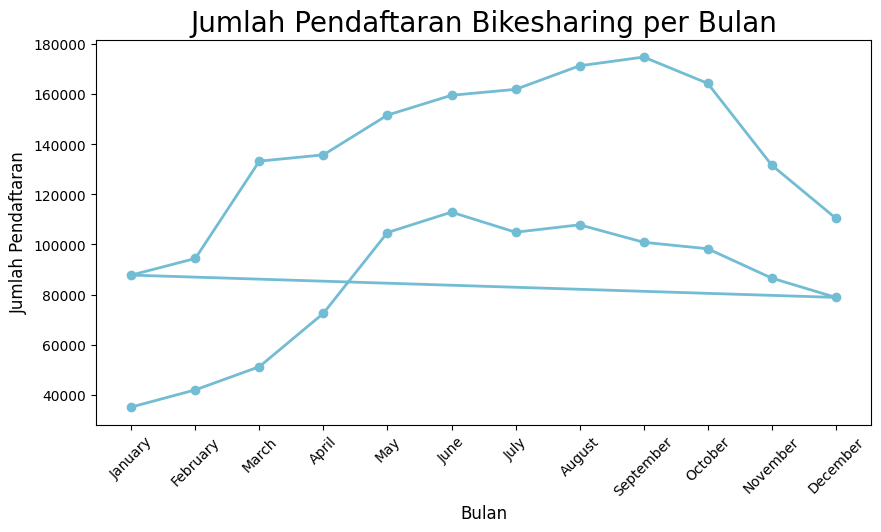

In [67]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_hour_df["dteday_x"],
    monthly_hour_df["registered_count"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Jumlah Pendaftaran Bikesharing per Bulan", loc="center", fontsize=20)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Jumlah Pendaftaran", fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2: Dibulan apa kelembapan udara paling rendah untuk waktu bersepeda yang baik?

In [68]:
monthly_hour_df = all_df.resample(rule='M', on='dteday_x').agg({
    "instant": "nunique",
    "hum_y": "min"
})
monthly_hour_df.index = monthly_hour_df.index.strftime('%B') #mengubah format order date menjadi Tahun-Bulan
monthly_hour_df = monthly_hour_df.reset_index()
monthly_hour_df.rename(columns={
    "instant": "instant",
    "hum_y": "hum_count"
}, inplace=True)
monthly_hour_df.head()

,dteday_x,instant,hum_count
0,January,31,0.72
1,February,28,0.35
2,March,31,0.30
3,April,30,0.28
4,May,31,0.35


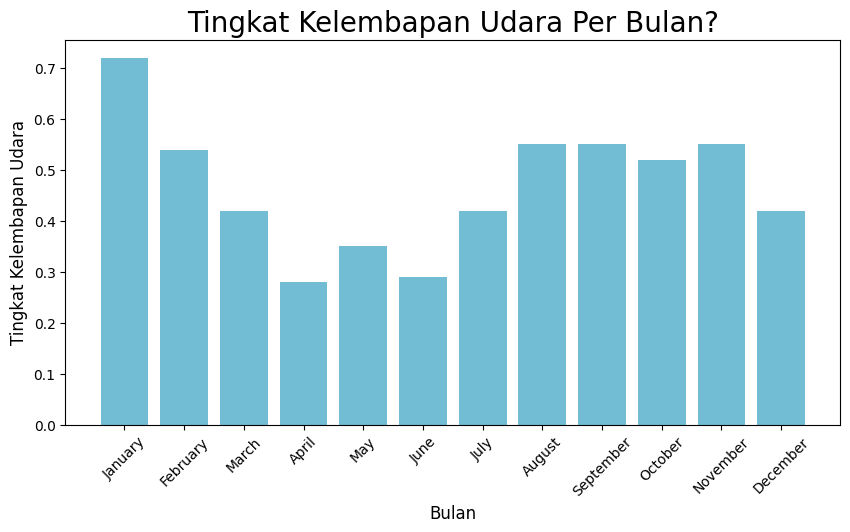

In [69]:
plt.figure(figsize=(10, 5))
plt.bar(
    monthly_hour_df["dteday_x"],
    monthly_hour_df["hum_count"],
    color="#72BCD4"
)
plt.title("Tingkat Kelembapan Udara Per Bulan?", loc="center", fontsize=20)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Tingkat Kelembapan Udara", fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

In [70]:
rfm_df = all_df.groupby(by="casual_x", as_index=False).agg({
    "dteday_x": "max", #tanggal penggunaan terakhir
    "instant": "nunique",
    "registered_x": "sum"
})
rfm_df.columns = ["casual_x", "registered_time", "frequency", "amount"]
rfm_df.head()

,casual_x,registered_time,frequency,amount
0,2,2012-10-29,1,20
1,9,2012-12-26,2,1106
2,15,2011-01-27,1,416
3,25,2011-01-12,1,1137
4,34,2011-01-26,1,472


## Conclusion

- Conclution pertanyaan 1 : dari pertanyaan 1 dapat di peroleh kesimpulan bahwa performa pendaftaran tertinggi terjadi sekitar bulan september dan performa pendaftaran terendah terjadi sekitar bulan Januari
- Conclution pertanyaan 2 : dari pertanyaan 2 dapat di peroleh kesimpulan bahwa waktu bersepeda terbaik dengan kelembapan rendah adalah sekitar bulan Januari